In [46]:
import pickle
import os
import sys

sys.path.append(os.path.abspath("../../"))

from preprocesingScripts.weather.weatherAcquisition_2 import WeatherAcq

# Lectura de datos
Cómo ya se han leido de forma previa no hace falta hcerlo de nuevo

In [51]:
with open("../../data/weather/df_weather_raw_per_year.pk1", "rb") as f:
    dfs_per_directory = pickle.load(f)

# Se interpolan los datos

In [52]:
import pandas as pd

df_weather_interpolated = {}

for year, df in dfs_per_directory.items():
    item = df.copy()

    # Columna DATE es datetime y se ordena
    item['DATE'] = pd.to_datetime(item['DATE'])
    item = item.sort_values('DATE')

    # Reindexar
    full_index = pd.date_range(start=item['DATE'].min(), end=item['DATE'].max(), freq='1T')
    item = item.set_index('DATE').reindex(full_index)

    # Interpolación temporal
    item = item.interpolate(method='time')

    # Restaurar DATE como columna
    item = item.reset_index().rename(columns={'index': 'DATE'})

    df_weather_interpolated[year] = item


C:\Users\burvu\AppData\Local\Temp\ipykernel_29616\224374953.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(start=item['DATE'].min(), end=item['DATE'].max(), freq='1T')
C:\Users\burvu\AppData\Local\Temp\ipykernel_29616\224374953.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  item = item.interpolate(method='time')
C:\Users\burvu\AppData\Local\Temp\ipykernel_29616\224374953.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(start=item['DATE'].min(), end=item['DATE'].max(), freq='1T')
C:\Users\burvu\AppData\Local\Temp\ipykernel_29616\224374953.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) b

# Se limpian los datos
-

In [53]:
df_weather_preprocesed = WeatherAcq().clean_data_dfs(
    dfs=df_weather_interpolated
)

# Se eliminan las columnas snow_depth y precipitation
cols_to_drop = ["snow_depth", "precipitation"]

# Crear una copia del DataFrame sin esas columnas
df_weather_preprocesed = df_weather_preprocesed.drop(columns=cols_to_drop).copy()

df_weather_preprocesed.to_pickle("../../data/weather/df_weather_preprocesed.pk1")


		 --- Grouping, cleaning and analisys data ---


>>>>> Analisys for 2022 <<<<<

		 --- Basic info ---

DATE                      datetime64[ns]
STATION                           object
Station_name                      object
temperature                      float64
wind_speed                       float64
precipitation                    float64
relative_humidity                float64
snow_depth                       float64
station_level_pressure           float64
dtype: object
                                DATE    temperature     wind_speed  \
count                         525588  525588.000000  525588.000000   
mean   2022-07-02 11:59:30.000001536      11.938459       4.648166   
min              2022-01-01 00:06:00     -22.800000       0.000000   
25%              2022-04-02 06:02:45       2.488333       3.100000   
50%              2022-07-02 11:59:30      12.310000       4.450000   
75%              2022-10-01 17:56:15      22.690000       6.168750   
max              2022-

# Se muestran las graficas

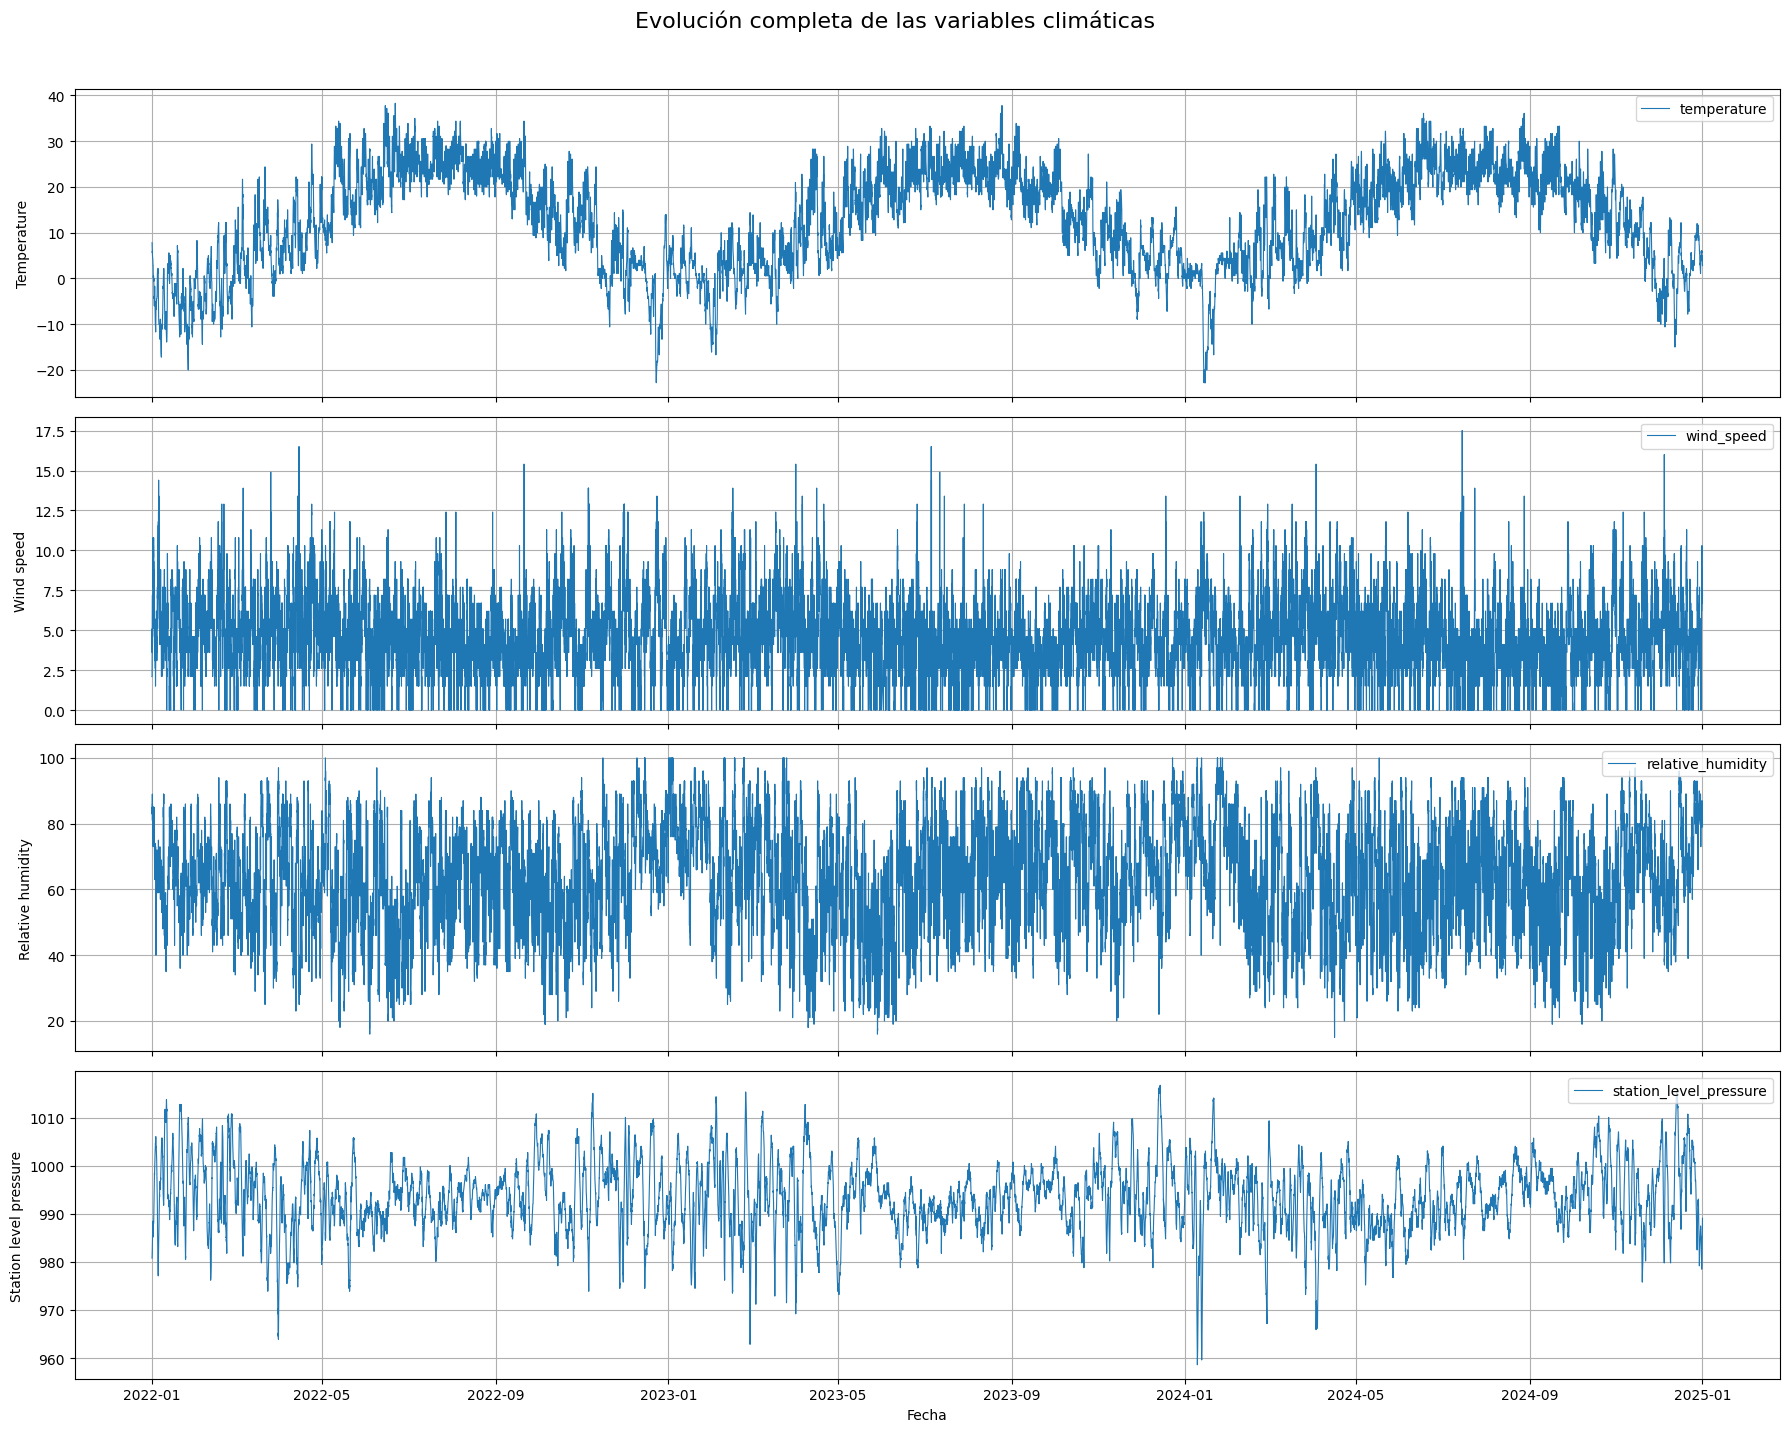

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

df = df_weather_preprocesed.copy()
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values('DATE')

# Variables a visualizar
variables = ['temperature', 'wind_speed', 'relative_humidity', 'station_level_pressure']

fig, axes = plt.subplots(len(variables), 1, figsize=(18, 14), sharex=True)

# Graficar cada variable
for i, var in enumerate(variables):
    if var in df.columns:
        axes[i].plot(df['DATE'], df[var], label=var, linewidth=0.8)
        axes[i].set_ylabel(var.replace('_', ' ').capitalize())
        axes[i].legend(loc='upper right')
        axes[i].grid(True)
    else:
        axes[i].text(0.5, 0.5, f'{var} no encontrada', ha='center', va='center', fontsize=12)
        axes[i].set_axis_off()

# Mejoras visuales
axes[-1].set_xlabel('Fecha')
plt.suptitle('Evolución completa de las variables climáticas', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
